<a href="https://colab.research.google.com/github/rozhrafiee/socialnetwork/blob/projects/football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install networkx

In [ ]:
import networkx as nx  # برای ایجاد و مدیریت گراف‌ها
import pandas as pd  # برای پردازش داده‌ها
from networkx.algorithms import community  # برای تحلیل جوامع در گراف
from networkx.algorithms.community.modularity_max import naive_greedy_modularity_communities  # الگوریتم برای یافتن جوامع در گراف
from google.colab import files  # برای آپلود فایل در Google Colab

files.upload()  # آپلود فایل‌ها از سیستم محلی به محیط Google Colab


Saving football.louvain to football.louvain
Saving football.clusters to football.clusters
Saving football.edges to football.edges


{'football.louvain': b'0\t0\n1\t1\n2\t2\n3\t3\n4\t0\n5\t3\n6\t2\n7\t4\n8\t4\n9\t0\n10\t3\n11\t0\n12\t5\n13\t2\n14\t5\n15\t2\n16\t0\n17\t6\n18\t5\n19\t7\n20\t6\n21\t4\n22\t4\n23\t0\n24\t0\n25\t1\n26\t5\n27\t6\n28\t0\n29\t7\n30\t7\n31\t5\n32\t2\n33\t1\n34\t5\n35\t7\n36\t6\n37\t1\n38\t5\n39\t2\n40\t3\n41\t0\n42\t5\n43\t5\n44\t8\n45\t1\n46\t9\n47\t2\n48\t8\n49\t9\n50\t0\n51\t4\n52\t3\n53\t9\n54\t5\n55\t7\n56\t6\n57\t8\n58\t6\n59\t6\n60\t2\n61\t5\n62\t6\n63\t6\n64\t2\n65\t6\n66\t8\n67\t9\n68\t4\n69\t0\n70\t6\n71\t5\n72\t3\n73\t9\n74\t3\n75\t8\n76\t6\n77\t4\n78\t4\n79\t7\n80\t7\n81\t3\n82\t7\n83\t9\n84\t3\n85\t5\n86\t8\n87\t6\n88\t9\n89\t1\n90\t0\n91\t8\n92\t8\n93\t0\n94\t7\n95\t6\n96\t6\n97\t6\n98\t3\n99\t5\n100\t2\n101\t7\n102\t3\n103\t1\n104\t0\n105\t1\n106\t2\n107\t3\n108\t4\n109\t1\n110\t9\n111\t4\n112\t8\n113\t6\n114\t9\n',
 'football.clusters': b'0\t8\n1\t1\n2\t3\n3\t4\n4\t8\n5\t4\n6\t3\n7\t9\n8\t9\n9\t8\n10\t4\n11\t11\n12\t7\n13\t3\n14\t7\n15\t3\n16\t8\n17\t10\n18\t7\n19\t2\n20\t10\n

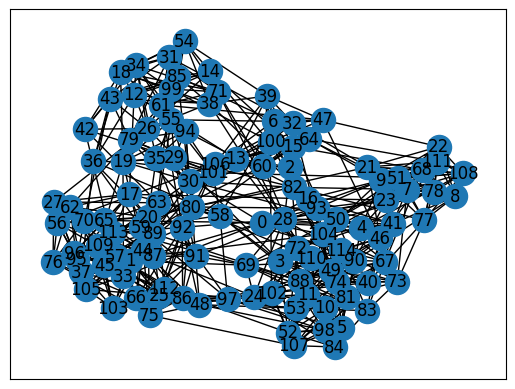

In [ ]:
df = pd.read_csv('/content/football.edges', sep='\t', names=['n1', 'n2'])
# خواندن فایل داده‌ها با فرمت edge list و مشخص کردن ستون‌های نودها (n1 و n2)

G = nx.from_pandas_edgelist(df, 'n1', 'n2', create_using=nx.Graph())
# ساختن گراف از دیتافریم با استفاده از ستون‌های نودها و تعریف نوع گراف (بدون جهت)

nx.draw_networkx(G)
# رسم گراف برای نمایش بصری نودها و ارتباطات بین آن‌ها


In [ ]:
def set_node_community(G, communities):
    for c, v_c in enumerate(communities):  # برای هر جامعه در لیست جوامع
        for v in v_c:  # برای هر نود در جامعه
            G.nodes[v]['community'] = c + 1  # مشخص کردن شماره جامعه برای نود
            # شماره جامعه را برای نودها تنظیم می‌کند

def set_edge_community(G):
    for v, w in G.edges:  # برای هر یال در گراف
        if G.nodes[v]['community'] == G.nodes[w]['community']:  # اگر نودهای یال در یک جامعه باشند
            G.edges[v, w]['community'] = G.nodes[v]['community']  # شماره جامعه را برای یال تنظیم می‌کند
        else:
            G.edges[v, w]['community'] = 0  # در غیر این صورت، شماره جامعه 0 است (یعنی یال بین دو جامعه مختلف)
            # این تابع مشخص می‌کند که آیا یال به دو نود در یک جامعه تعلق دارد یا خیر

def get_color(i, r_off=1, g_off=3, b_off=5):
    r0, g0, b0 = 0, 0, 0  # مقادیر اولیه رنگ‌ها
    n = 16  # تعداد رنگ‌ها
    low = 0.1  # حداقل مقدار رنگ
    high = 0.9  # حداکثر مقدار رنگ
    span = high - low  # دامنه رنگ‌ها
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)  # محاسبه مقدار رنگ قرمز
    g = low + span * (((i + g_off) * 3) % n) / (n - 1)  # محاسبه مقدار رنگ سبز
    b = low + span * (((i + b_off) * 3) % n) / (n - 1)  # محاسبه مقدار رنگ آبی
    return (r, g, b)  # بازگرداندن رنگ محاسبه شده به صورت یک تاپل (r, g, b)


In [ ]:
result = community.girvan_newman(G)
# اجرای الگوریتم Girvan-Newman برای شناسایی جوامع در گراف G

communities1 = next(result)
# دریافت اولین تقسیم‌بندی جوامع از نتایج الگوریتم

print(len(communities1))
# چاپ تعداد جوامع در اولین تقسیم‌بندی

print(communities1)
# چاپ جوامع شناسایی‌شده

list(enumerate(communities1))
# تبدیل جوامع به یک لیست از اندیس‌ها و جوامع به شکل (index, community)


2
({0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 21, 22, 23, 24, 28, 32, 39, 40, 41, 46, 47, 49, 50, 51, 52, 53, 60, 64, 67, 68, 69, 72, 73, 74, 77, 78, 81, 82, 83, 84, 88, 90, 93, 98, 100, 102, 104, 106, 107, 108, 110, 111, 114}, {1, 12, 14, 17, 18, 19, 20, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 42, 43, 44, 45, 48, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 70, 71, 75, 76, 79, 80, 85, 86, 87, 89, 91, 92, 94, 95, 96, 97, 99, 101, 103, 105, 109, 112, 113})


[(0,
  {0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   13,
   15,
   16,
   21,
   22,
   23,
   24,
   28,
   32,
   39,
   40,
   41,
   46,
   47,
   49,
   50,
   51,
   52,
   53,
   60,
   64,
   67,
   68,
   69,
   72,
   73,
   74,
   77,
   78,
   81,
   82,
   83,
   84,
   88,
   90,
   93,
   98,
   100,
   102,
   104,
   106,
   107,
   108,
   110,
   111,
   114}),
 (1,
  {1,
   12,
   14,
   17,
   18,
   19,
   20,
   25,
   26,
   27,
   29,
   30,
   31,
   33,
   34,
   35,
   36,
   37,
   38,
   42,
   43,
   44,
   45,
   48,
   54,
   55,
   56,
   57,
   58,
   59,
   61,
   62,
   63,
   65,
   66,
   70,
   71,
   75,
   76,
   79,
   80,
   85,
   86,
   87,
   89,
   91,
   92,
   94,
   95,
   96,
   97,
   99,
   101,
   103,
   105,
   109,
   112,
   113})]

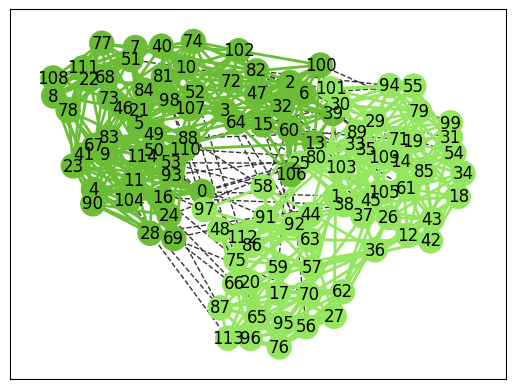

In [ ]:
set_node_community(G, communities1)
# تنظیم جوامع برای نودها در گراف G با استفاده از تقسیم‌بندی جوامع communities1

set_edge_community(G)
# تنظیم جوامع برای یال‌ها بر اساس جوامع نودهای متصل به هم

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# تعیین رنگ برای نودها بر اساس جامعه‌ای که هر نود به آن تعلق دارد

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# شناسایی یال‌های خارجی که بین دو جامعه مختلف قرار دارند (یعنی جامعه 0)

internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
# شناسایی یال‌های داخلی که بین نودهایی از یک جامعه مشترک قرار دارند

internal_color = [get_color(G.edges[e]['community']) for e in internal]
# تعیین رنگ برای یال‌های داخلی بر اساس جامعه‌ای که به آن تعلق دارند

football = nx.spring_layout(G)
# استفاده از چینش spring برای تعیین موقعیت نودها در گراف

nx.draw_networkx_nodes(G, pos=football, node_color=node_color)
# رسم نودها با رنگ‌هایی که برای هر کدام تعیین شده است

nx.draw_networkx_labels(G, pos=football)
# اضافه کردن برچسب‌ها (اسم نودها) به گراف

nx.draw_networkx_edges(G, pos=football, edgelist=external, edge_color='#333333', width=1, style='dashed')
# رسم یال‌های خارجی با رنگ خاکستری و خط چین

nx.draw_networkx_edges(G, pos=football, edgelist=internal, edge_color=internal_color, width=2)
# رسم یال‌های داخلی با رنگ‌های خاص هر جامعه


In [ ]:
communities2 = community.greedy_modularity_communities(G)
# اجرای الگوریتم greedy_modularity_communities برای شناسایی جوامع در گراف G با استفاده از ماژولاریتی

print(len(communities2))
# چاپ تعداد جوامع شناسایی شده توسط الگوریتم

print(communities2)
# چاپ جوامع شناسایی شده


6
[frozenset({65, 66, 70, 75, 76, 17, 20, 86, 87, 27, 91, 92, 95, 96, 97, 36, 42, 44, 48, 112, 113, 56, 57, 58, 59, 62, 63}), frozenset({67, 68, 7, 8, 73, 9, 77, 78, 16, 21, 22, 23, 88, 104, 41, 108, 110, 46, 111, 49, 114, 51, 53}), frozenset({0, 1, 79, 80, 82, 19, 89, 25, 93, 29, 30, 94, 33, 35, 101, 37, 103, 105, 109, 45, 55}), frozenset({2, 3, 4, 5, 69, 72, 74, 10, 11, 81, 83, 84, 24, 90, 28, 98, 102, 40, 107, 50, 52}), frozenset({34, 99, 38, 71, 43, 12, 14, 18, 85, 54, 26, 61, 31}), frozenset({64, 32, 100, 6, 39, 106, 13, 15, 47, 60})]


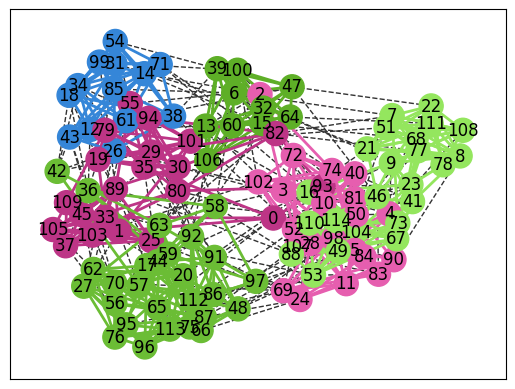

In [ ]:
set_node_community(G, communities2)
# تنظیم جوامع برای نودها در گراف G با استفاده از تقسیم‌بندی جوامع communities2 که توسط الگوریتم greedy_modularity_communities شناسایی شده است

set_edge_community(G)
# تنظیم جوامع برای یال‌ها بر اساس جوامع نودهای متصل به هم

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# تعیین رنگ برای نودها بر اساس جامعه‌ای که هر نود به آن تعلق دارد

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# شناسایی یال‌های خارجی که بین دو جامعه مختلف قرار دارند (یعنی جامعه 0)

internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
# شناسایی یال‌های داخلی که بین نودهایی از یک جامعه مشترک قرار دارند

internal_color = [get_color(G.edges[e]['community']) for e in internal]
# تعیین رنگ برای یال‌های داخلی بر اساس جامعه‌ای که به آن تعلق دارند

football = nx.spring_layout(G)
# استفاده از چینش spring برای تعیین موقعیت نودها در گراف

nx.draw_networkx_nodes(G, pos=football, node_color=node_color)
# رسم نودها با رنگ‌هایی که برای هر کدام تعیین شده است

nx.draw_networkx_labels(G, pos=football)
# اضافه کردن برچسب‌ها (اسم نودها) به گراف

nx.draw_networkx_edges(G, pos=football, edgelist=external, edge_color='#333333', width=1, style='dashed')
# رسم یال‌های خارجی با رنگ خاکستری و خط چین

nx.draw_networkx_edges(G, pos=football, edgelist=internal, edge_color=internal_color, width=2)
# رسم یال‌های داخلی با رنگ‌های خاص هر جامعه


In [ ]:
communities3 = community.naive_greedy_modularity_communities(G)
# اجرای الگوریتم naive_greedy_modularity_communities برای شناسایی جوامع در گراف G

print(len(communities3))
# چاپ تعداد جوامع شناسایی‌شده توسط الگوریتم

print(communities3)
# چاپ جوامع شناسایی‌شده


6
[frozenset({0, 3, 4, 5, 9, 10, 11, 16, 23, 24, 28, 40, 41, 46, 49, 50, 52, 53, 67, 69, 72, 73, 74, 81, 83, 84, 88, 90, 93, 98, 102, 104, 107, 110, 114}), frozenset({65, 66, 70, 75, 76, 17, 20, 86, 87, 27, 91, 92, 95, 96, 97, 36, 42, 44, 48, 113, 112, 56, 57, 58, 59, 62, 63}), frozenset({1, 79, 80, 82, 19, 89, 25, 29, 30, 94, 33, 35, 101, 37, 103, 105, 109, 45, 55}), frozenset({34, 99, 38, 71, 43, 12, 14, 18, 85, 54, 26, 61, 31}), frozenset({64, 32, 2, 100, 6, 39, 106, 13, 15, 47, 60}), frozenset({68, 7, 8, 108, 77, 78, 111, 51, 21, 22})]


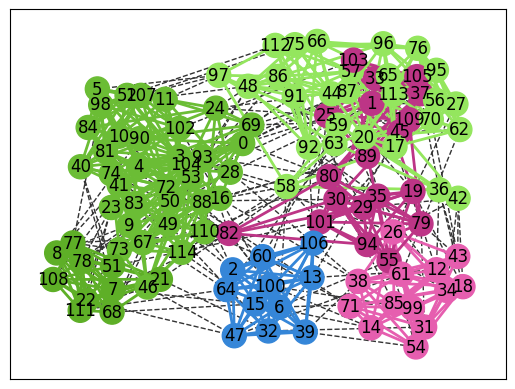

In [ ]:
set_node_community(G, communities3)
# تنظیم جوامع برای نودها در گراف G با استفاده از تقسیم‌بندی جوامع communities3 که توسط الگوریتم naive_greedy_modularity_communities شناسایی شده است

set_edge_community(G)
# تنظیم جوامع برای یال‌ها بر اساس جوامع نودهای متصل به هم

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# تعیین رنگ برای نودها بر اساس جامعه‌ای که هر نود به آن تعلق دارد

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# شناسایی یال‌های خارجی که بین دو جامعه مختلف قرار دارند (یعنی جامعه 0)

internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
# شناسایی یال‌های داخلی که بین نودهایی از یک جامعه مشترک قرار دارند

internal_color = [get_color(G.edges[e]['community']) for e in internal]
# تعیین رنگ برای یال‌های داخلی بر اساس جامعه‌ای که به آن تعلق دارند

football = nx.spring_layout(G)
# استفاده از چینش spring برای تعیین موقعیت نودها در گراف

nx.draw_networkx_nodes(G, pos=football, node_color=node_color)
# رسم نودها با رنگ‌هایی که برای هر کدام تعیین شده است

nx.draw_networkx_labels(G, pos=football)
# اضافه کردن برچسب‌ها (اسم نودها) به گراف

nx.draw_networkx_edges(G, pos=football, edgelist=external, edge_color='#333333', width=1, style='dashed')
# رسم یال‌های خارجی با رنگ خاکستری و خط چین

nx.draw_networkx_edges(G, pos=football, edgelist=internal, edge_color=internal_color, width=2)
# رسم یال‌های داخلی با رنگ‌های خاص هر جامعه


In [ ]:
communities4 = sorted(community.asyn_lpa_communities(G), key=len, reverse=True)
# اجرای الگوریتم asyn_lpa_communities برای شناسایی جوامع در گراف G و سپس ترتیب‌بندی جوامع بر اساس تعداد اعضای هر جامعه به صورت نزولی

print(len(communities4))
# چاپ تعداد جوامع شناسایی‌شده توسط الگوریتم

print(communities4)
# چاپ جوامع شناسایی‌شده


12
[{34, 99, 36, 38, 71, 42, 43, 12, 14, 18, 85, 54, 26, 61, 31}, {96, 65, 70, 76, 17, 113, 20, 87, 56, 27, 62, 95}, {98, 3, 5, 102, 72, 40, 74, 10, 107, 81, 52, 84}, {64, 32, 2, 100, 6, 39, 106, 13, 47, 15, 60}, {35, 101, 79, 80, 82, 19, 55, 94, 29, 30}, {68, 7, 8, 108, 77, 78, 111, 51, 21, 22}, {89, 1, 33, 37, 103, 105, 45, 109, 25}, {66, 75, 44, 48, 112, 86, 57, 91, 92}, {67, 73, 46, 110, 49, 114, 83, 53, 88}, {0, 4, 104, 9, 41, 16, 23, 93}, {69, 11, 50, 24, 90, 28}, {97, 58, 59, 63}]


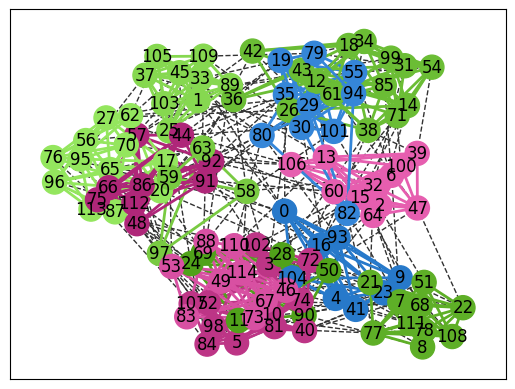

In [ ]:
set_node_community(G, communities4)
# تنظیم جوامع برای نودها در گراف G با استفاده از تقسیم‌بندی جوامع communities4 که توسط الگوریتم asyn_lpa_communities شناسایی شده است

set_edge_community(G)
# تنظیم جوامع برای یال‌ها بر اساس جوامع نودهای متصل به هم

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# تعیین رنگ برای نودها بر اساس جامعه‌ای که هر نود به آن تعلق دارد

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# شناسایی یال‌های خارجی که بین دو جامعه مختلف قرار دارند (یعنی جامعه 0)

internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
# شناسایی یال‌های داخلی که بین نودهایی از یک جامعه مشترک قرار دارند

internal_color = [get_color(G.edges[e]['community']) for e in internal]
# تعیین رنگ برای یال‌های داخلی بر اساس جامعه‌ای که به آن تعلق دارند

football = nx.spring_layout(G)
# استفاده از چینش spring برای تعیین موقعیت نودها در گراف

nx.draw_networkx_nodes(G, pos=football, node_color=node_color)
# رسم نودها با رنگ‌هایی که برای هر کدام تعیین شده است

nx.draw_networkx_labels(G, pos=football)
# اضافه کردن برچسب‌ها (اسم نودها) به گراف

nx.draw_networkx_edges(G, pos=football, edgelist=external, edge_color='#333333', width=1, style='dashed')
# رسم یال‌های خارجی با رنگ خاکستری و خط چین

nx.draw_networkx_edges(G, pos=football, edgelist=internal, edge_color=internal_color, width=2)
# رسم یال‌های داخلی با رنگ‌های خاص هر جامعه


In [ ]:
communities5 = sorted(community.label_propagation_communities(G), key=len, reverse=True)
# اجرای الگوریتم label_propagation_communities برای شناسایی جوامع در گراف G و سپس ترتیب‌بندی جوامع بر اساس تعداد اعضای هر جامعه به صورت نزولی

print(len(communities5))
# چاپ تعداد جوامع شناسایی‌شده توسط الگوریتم

print(communities5)
# چاپ جوامع شناسایی‌شده


9
[{1, 11, 24, 25, 28, 33, 36, 37, 45, 46, 49, 50, 53, 58, 59, 63, 67, 69, 73, 83, 88, 89, 90, 97, 103, 105, 109, 110, 114}, {19, 29, 30, 35, 42, 44, 48, 55, 57, 66, 75, 79, 80, 82, 86, 91, 92, 94, 101, 112}, {96, 65, 70, 76, 17, 113, 20, 87, 56, 27, 62, 95}, {98, 3, 5, 102, 72, 40, 74, 10, 107, 81, 52, 84}, {64, 32, 2, 100, 6, 39, 106, 13, 47, 15, 60}, {68, 7, 8, 108, 77, 78, 111, 51, 21, 22}, {0, 4, 104, 9, 41, 16, 23, 93}, {34, 99, 71, 18, 54, 61, 31}, {38, 43, 12, 14, 85, 26}]


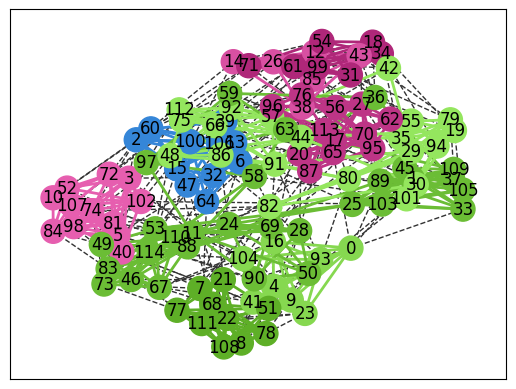

In [ ]:
set_node_community(G, communities5)
# تنظیم جوامع برای نودها در گراف G با استفاده از تقسیم‌بندی جوامع communities5 که توسط الگوریتم label_propagation_communities شناسایی شده است

set_edge_community(G)
# تنظیم جوامع برای یال‌ها بر اساس جوامع نودهای متصل به هم

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# تعیین رنگ برای نودها بر اساس جامعه‌ای که هر نود به آن تعلق دارد

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# شناسایی یال‌های خارجی که بین دو جامعه مختلف قرار دارند (یعنی جامعه 0)

internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
# شناسایی یال‌های داخلی که بین نودهایی از یک جامعه مشترک قرار دارند

internal_color = [get_color(G.edges[e]['community']) for e in internal]
# تعیین رنگ برای یال‌های داخلی بر اساس جامعه‌ای که به آن تعلق دارند

football = nx.spring_layout(G)
# استفاده از چینش spring برای تعیین موقعیت نودها در گراف

nx.draw_networkx_nodes(G, pos=football, node_color=node_color)
# رسم نودها با رنگ‌هایی که برای هر کدام تعیین شده است

nx.draw_networkx_labels(G, pos=football)
# اضافه کردن برچسب‌ها (اسم نودها) به گراف

nx.draw_networkx_edges(G, pos=football, edgelist=external, edge_color='#333333', width=1, style='dashed')
# رسم یال‌های خارجی با رنگ خاکستری و خط چین

nx.draw_networkx_edges(G, pos=football, edgelist=internal, edge_color=internal_color, width=2)
# رسم یال‌های داخلی با رنگ‌های خاص هر جامعه


In [ ]:
communities6 = sorted(community.louvain_communities(G), key=len, reverse=True)
# اجرای الگوریتم Louvain برای شناسایی جوامع در گراف G و سپس ترتیب‌بندی جوامع بر اساس تعداد اعضای هر جامعه به صورت نزولی

print(len(communities6))
# چاپ تعداد جوامع شناسایی‌شده توسط الگوریتم Louvain

print(communities6)
# چاپ جوامع شناسایی‌شده


10
[{65, 70, 76, 17, 20, 87, 27, 95, 96, 97, 113, 56, 58, 59, 62, 63}, {34, 99, 36, 38, 71, 42, 43, 12, 14, 18, 85, 54, 26, 61, 31}, {0, 4, 69, 104, 41, 9, 11, 16, 50, 23, 24, 90, 28, 93}, {98, 3, 5, 102, 40, 72, 74, 107, 10, 81, 52, 84}, {64, 32, 2, 100, 6, 39, 106, 13, 15, 47, 60}, {68, 7, 8, 108, 77, 78, 111, 51, 21, 22}, {35, 101, 79, 80, 82, 19, 55, 94, 29, 30}, {33, 1, 37, 103, 105, 45, 109, 89, 25}, {66, 75, 44, 112, 48, 86, 57, 91, 92}, {67, 73, 110, 46, 49, 114, 83, 53, 88}]


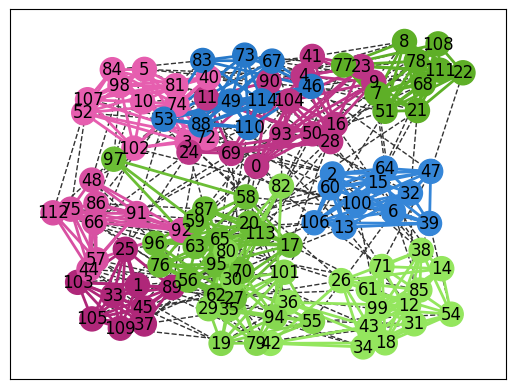

In [ ]:
set_node_community(G, communities6)
# تنظیم جوامع برای نودها در گراف G با استفاده از تقسیم‌بندی جوامع communities6 که توسط الگوریتم Louvain شناسایی شده است

set_edge_community(G)
# تنظیم جوامع برای یال‌ها بر اساس جوامع نودهای متصل به هم

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# تعیین رنگ برای نودها بر اساس جامعه‌ای که هر نود به آن تعلق دارد

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
# شناسایی یال‌های خارجی که بین دو جامعه مختلف قرار دارند (یعنی جامعه 0)

internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
# شناسایی یال‌های داخلی که بین نودهایی از یک جامعه مشترک قرار دارند

internal_color = [get_color(G.edges[e]['community']) for e in internal]
# تعیین رنگ برای یال‌های داخلی بر اساس جامعه‌ای که به آن تعلق دارند

football = nx.spring_layout(G)
# استفاده از چینش spring برای تعیین موقعیت نودها در گراف

nx.draw_networkx_nodes(G, pos=football, node_color=node_color)
# رسم نودها با رنگ‌هایی که برای هر کدام تعیین شده است

nx.draw_networkx_labels(G, pos=football)
# اضافه کردن برچسب‌ها (اسم نودها) به گراف

nx.draw_networkx_edges(G, pos=football, edgelist=external, edge_color='#333333', width=1, style='dashed')
# رسم یال‌های خارجی با رنگ خاکستری و خط چین

nx.draw_networkx_edges(G, pos=football, edgelist=internal, edge_color=internal_color, width=2)
# رسم یال‌های داخلی با رنگ‌های خاص هر جامعه


In [ ]:
print(community.modularity(G, communities1))
# محاسبه و چاپ مدولاریتی (Modularity) برای تقسیم‌بندی جوامع communities1

print(community.modularity(G, communities2))
# محاسبه و چاپ مدولاریتی برای تقسیم‌بندی جوامع communities2

print(community.modularity(G, communities3))
# محاسبه و چاپ مدولاریتی برای تقسیم‌بندی جوامع communities3

print(community.modularity(G, communities4))
# محاسبه و چاپ مدولاریتی برای تقسیم‌بندی جوامع communities4

print(community.modularity(G, communities5))
# محاسبه و چاپ مدولاریتی برای تقسیم‌بندی جوامع communities5

print(community.modularity(G, communities6))
# محاسبه و چاپ مدولاریتی برای تقسیم‌بندی جوامع communities6


0.4003563359404315
0.5497406651426807
0.5682413929834553
0.6010088644885554
0.5521197863581082
0.6045695626834571
